The ARCH model for financial time series (Engle, 1982) is defined by
$$
\begin{aligned}
Y_t & =\sigma_t \epsilon_t \quad \text { with } \quad \epsilon_t \sim \mathrm{~N}(0,1), \\
\text { where } \sigma_t^2 & =\theta_1+\theta_2 Y_{t-1}^2, \quad \theta_1>0, \theta_2>0 .
\end{aligned}
$$

ARCH is the acronym for Auto Regressive Conditionally Heteroschedastic. Its goal is to model volatility clustering ("Conditionally Heteroschedastic": the conditional variance given the past is not constant): it is the phenomenon observed in finance that high volatility (high variance) tends to occur in cluster, as do quiet periods (low volatility) on the financial markets.

The ARCH model is used in finance to model log-returnx $Y_t=\log \left(X_{t+1} / X_t\right)$ of stock option values or indexes $X_t$ such as the Nasdaq.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

1. Write a function simuARCH1 that simulates data, here a time series of length $n$, that follows an $\operatorname{ARCH}(1)$ model of parameter $\left(\theta_1, \theta_2\right)$.

In [20]:
def simuARCH1(n, theta1, theta2, m=None):
    """
    Simulate an ARCH(1) process of length n with parameters theta1 and theta2.
    """
    size= (n, m) if m is not None else (n,)
    eps = np.random.normal(size=size)
    sigma2 = np.zeros(size)
    y = np.zeros(size)

    sigma2[0] = theta1 / (1 - theta2)

    for t in range(1, size[0]):
        sigma2[t] = theta1 + theta2 * y[t-1]**2
        y[t] = eps[t] * np.sqrt(sigma2[t])

    return y, sigma2

2. Derive the likelihood function (conditional on $Y_1$ ) and write a function neglogL-ARCH1 that calculates for any $\left(\theta_1, \theta_2\right) \in \mathbb{R}^{+} \times \mathbb{R}^{+}$ the negative log-likelihood.

Given $Y_{t-1}$, $Y_t$ is normally distributed: $Y_t \mid Y_{t-1} \sim \mathcal{N}(0, \sigma_t^2)$, with $\sigma_t^2 = \theta_1 + \theta_2 Y_{t-1}^2$. So the conditional likelihood is
$$
f(Y_t \mid Y_{t-1}; \theta_1,\theta_2)
= \frac{1}{\sqrt{2\pi \sigma_t^2}}
\exp\left(-\frac{Y_t^2}{2\sigma_t^2}\right)
$$
and, conditioning on $Y_1$, the joint conditional likelihood of $Y_2, \dots, Y_n$ is:
$$
L(\theta_1, \theta_2 \mid Y_1, \dots, Y_n)
= \prod_{t=2}^n
\frac{1}{\sqrt{2\pi (\theta_1 + \theta_2 Y_{t-1}^2)}}
\exp\left[-\frac{Y_t^2}{2(\theta_1 + \theta_2 Y_{t-1}^2)}\right].
$$
And negative log-likelihood:
$$
-\ell(\theta_1, \theta_2)
= \frac{1}{2}\sum_{t=2}^n
\left[
\log(2\pi)
+ \log(\theta_1 + \theta_2 Y_{t-1}^2)
+ \frac{Y_t^2}{\theta_1 + \theta_2 Y_{t-1}^2}
\right].
$$



In [23]:
def neglogL_ARCH1(theta1, theta2, y):
    """
    Calculate the negative log-likelihood of an ARCH(1) model given parameters and data.

    Non-vectorized version:

        n = len(y)
        logL = 0
        for t in range(1, n):
            logL += 0.5 * (np.log(2 * np.pi) + np.log(theta1 + theta2 * y[t-1]**2) + (y[t]**2) / (theta1 + theta2 * y[t-1]**2))

        return logL
    """
    n = len(y)
    logL = (n-1)*np.log(2 * np.pi)
    logL += np.sum(np.log(theta1 + theta2 * y[:-1]**2), axis=0)
    logL += np.sum((y[1:]**2) / (theta1 + theta2 * y[:-1]**2), axis=0)
    return logL/2

3. Write a function MLE-ARCH1 that calculates the MLE ( $\hat{\theta}_1^{\text {MLE }}, \hat{\theta}_2^{\text {MLE }}$ ) given data.

In [ ]:
from scipy.optimize import minimize

def MLE_ARCH1(y):
    """
    Calculate the MLE of an ARCH(1) model given data.

    def objective(params, y_col):
        theta1, theta2 = params
        if theta1 <= 0 or theta2 <= 0:
            return np.inf
        return neglogL_ARCH1(theta1, theta2, y_col)

    result = minimize(objective, [0.5, 0.5], args=(y,))

    if result.success:
        return result.x
    else:
        return [np.nan, np.nan]
    """
    if y.ndim == 1:
        y = y[:, None]
    n, m = y.shape
    thetas = np.zeros((2, m))

    def objective(params, y_col):
        theta1, theta2 = params
        if theta1 <= 0 or theta2 <= 0:
            return np.inf
        return neglogL_ARCH1(theta1, theta2, y_col)

    for j in range(m):
        y_col = y[:, j]
        result = minimize(objective, [0.5, 0.5], args=(y_col,))

        if result.success:
            thetas[:, j] = result.x
        else:
            thetas[:, j] = np.nan

    return thetas

4. Choose a set of value for $\left(\theta_1, \theta_2\right)$, preferably with $\theta_2<1$ for the time series to be stationary. Perform a Monte-Carlo simulation to investigate the asymptotic normality of the of $\hat{\theta}_1^{\mathrm{MLE}}$ and $\hat{\theta}_2^{\mathrm{MLE}}$ predicted by the theory.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/optimize/_numdiff.py:686: RuntimeWarning: invalid value encountered in subtract
  df = [f_eval - f0 for f_eval in f_evals]
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/optimize/_numdiff.py:686: RuntimeWarning: invalid value encountered in subtract
  df = [f_eval - f0 for f_eval in f_evals]
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/optimize/_numdiff.py:686: RuntimeWarning: invalid value encountered in subtract
  df = [f_eval - f0 for f_eval in f_evals]
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/optimize/_numdiff.py:686: RuntimeWarning: invalid value encountered in subtract
  df = [f_eval - f0 for f_eval in f_evals]
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/optimize/_numdiff.py:686: RuntimeWarning: invalid value encountered in subtrac

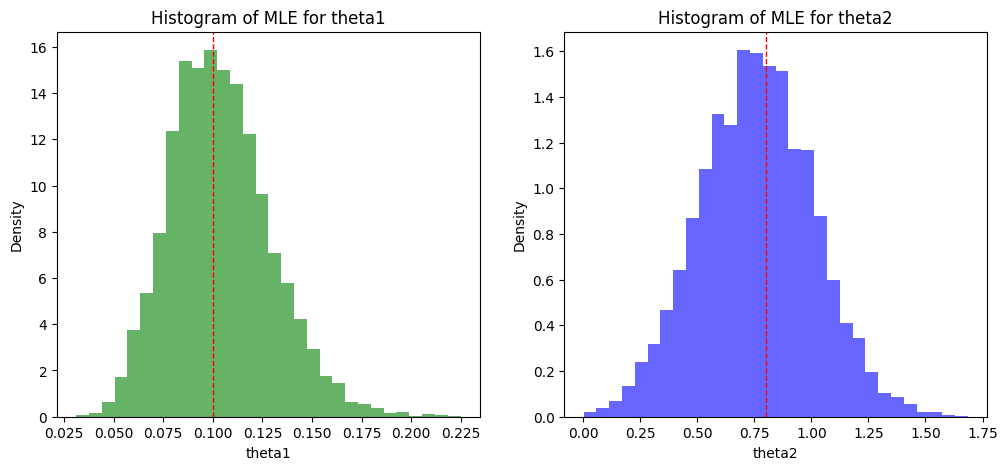

In [25]:
# Perform a Monte-Carlo simulation to investigate the asymptotic normality of the MLEs
def monte_carlo_simulation(theta1, theta2, n, num_simulations):
    y, _ = simuARCH1(n, theta1, theta2, m=num_simulations)
    estimates = MLE_ARCH1(y)
    return estimates

# Parameters for the simulation
theta1_true = 0.1
theta2_true = 0.8
n = 100
num_simulations = 5000
estimates = monte_carlo_simulation(theta1_true, theta2_true, n, num_simulations)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].hist(estimates[0, :], bins=30, density=True, alpha=0.6, color='g')
ax[0].axvline(theta1_true, color='r', linestyle='dashed', linewidth=1)
ax[0].set_title('Histogram of MLE for theta1')
ax[0].set_xlabel('theta1')
ax[0].set_ylabel('Density')

ax[1].hist(estimates[1, :], bins=30, density=True, alpha=0.6, color='b')
ax[1].axvline(theta2_true, color='r', linestyle='dashed', linewidth=1)
ax[1].set_title('Histogram of MLE for theta2')
ax[1].set_xlabel('theta2')
ax[1].set_ylabel('Density')
plt.show()

In [26]:
# Question 5: proportion of non-stationary estimates
non_stationary_prop = np.mean(estimates[1, :] >= 1)
print(f"Proportion of MLE estimates with θ₂ ≥ 1 (non-stationary): {non_stationary_prop:.4f}")

Proportion of MLE estimates with θ₂ ≥ 1 (non-stationary): 0.1574
